![Pythia logo.](figures/pythiapicture.png)
# Pythia 8.3 Tuning Worksheet

This worksheet is largely based on the [Monash Tune paper](https://arxiv.org/pdf/1404.5630.pdf), and in many places, the text is copied verbatim from this paper. The [Monash Tune paper](https://arxiv.org/pdf/1404.5630.pdf) paper was written by:
- Peter Skands (School of Physics, Monash University)
- Stefano Carrazza (Dipartimento di Fisica, Università degli Studi di Milano)
- Juan Rojo (Department of Physics and Astronomy, Vrije University)

The technical aspects of this worksheet were written by:

- Philip Ilten (School of Physics, University of Cincinnati)

Any errors introduced during the technical translation from the Monash Tune paper are entirely the fault of Philip Ilten, and not the Monash Tune paper authors. This tutorial was in part supported by NSF OAC-2103889.
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mathrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mathrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This tutorial is intended specifically to explore some of the aspects of tuning Pythia. For users who are new to Pythia, please first work through the *A "Hello World" Program* and *A first realistic analysis* examples of the [Pythia 8.3 Python Worksheet](worksheet8309.ipynb). The appendices can also be useful for users not familiar with some of the technical features of Pythia. [Appendix: The Event Record](worksheet8309.ipynb#eventRecord) contains a brief summary of the event-record structure and [Appendix: Some Facilities](worksheet8309.ipynb#someFacilities) describes the use of some built-in functionality for [Histograms](worksheet8309.ipynb#histograms) and [Jet finding](worksheet8309.ipynb#jetFinding). In this tutorial a focus is given to generating and exploring distributions that are sensitive to Pythia parameters, and is based on the structure of the [Monash Tune paper](https://arxiv.org/pdf/1404.5630.pdf), including text.

For practical usage of Pythia, the [Pythia 8.3 HTML manual](https://pythia.org/manuals/pythia8309/Welcome.html) provides full documentation on running and configuring Pythia. A local version of this manual can be accessed by opening `htmldoc/Welcome.html` in a browser. A [Pythia 8.3 Doxygen manual](https://pythia.org/doxygen/pythia8309) is also available, although the HTML manual should always be used as the primary documentation.

<a id='fsr'></a>
## Final-State Radiation

The main parameter governing final-state radiation is the effective value of the strong coupling, which in Pythia is specified by giving the value of $\as(M_\Z)$. In the Monash tune, a set of light-flavour ($\u\d\s\c$) tagged $\e^+\e^-$ event shapes measured by the L3 experiment were used to extract a best-fit value for $\as(M_\Z)$. This prevents $\B$ decays from contaminating this step of the analysis. Heavy-quark fragmentation is treated separately. The renormalization scale for final-state shower emissions in Pythia is fixed to be:

$$\mu_R^2 = \pTse = z(1-z)Q^2$$

with $Q^2 = p^2 - m_0^2$ the offshellness of the emitting parton (with on-shell mass $m_0$), and $z$ the energy fraction appearing in the DGLAP splitting kernels, $P(z)$. To estimate the shower uncertainties associated with this choice of renormalization scale, the Monash authors recommend using $\ln(\mu_R^2) \pm \ln(2)$, corresponding to a factor $\sqrt{2}$ variation of $\mu_R$.

For the infrared shower cutoff, the Monash tune authors chose a value close to $\Lambda_\mathrm{QCD}$, in order to have a smooth transition between low-$\pT$ perturbative emissions and non-perturbative string breaks, the latter of which involve $\pT$ kicks of order $\Lambda_\mathrm{QCD}$. In principle, the perturbative evolution could be continued to even lower scales, if combined with a non-perturbative regularization of $\as$, but such low cutoff values could risk generating problems at the fragmentation stage since the technical implementation of the string model becomes complicated if there are too many small gluon "kinks" spaced closely along the strings. The Monash tune sets the following relevant parameters:
```
# FSR: Strong Coupling
TimeShower:alphaSvalue = 0.1365
TimeShower:alphaSorder = 1
TimeShower:alphaSuseCMW = off
# FSR: IR cutoff
TimeShower:pTmin = 0.50     ! for QCD radiation
TimeShower:pTminChgQ = 0.50 ! for QED radiation off quarks
# FSR: Spin Correlations
TimeShower:phiPolAsym = on  ! approximate FSR polarization effects
```

In the following code, we can explore these parameters, and how they change the thrust event-shape variable. Namely, we focus on the `TimeShower:alphaSvalue` and `TimeShower:pTmin = 0.50` parameters, although `TimeShower:alphaSorder = 1` is also of interest. First, we do some technical set up where we import the Pythia module and create a little `matplotlib` plotting routine for the `pythia8.Hist` class.

In [3]:
# Import the Pythia module.
import pythia8

# Create a little plotting tool for the Pythia histogram class.
%matplotlib inline
from matplotlib import pyplot
def plot(hists, xlim = None, ylim = None, xlog = False, ylog = False, 
         xlabel = None, ylabel = None, norm = False, fnc = None):
    for hist in hists:
        if norm: hist.normalize()
        x = [x for x0, x1 in zip(
            hist.getBinEdges()[::1], hist.getBinEdges()[1::1])
            for x in (x0, x1)]
        y = [y for y0 in hist.getBinContents()
             for y in (y0, y0)]
        pyplot.plot(x, y, label = hist.getTitle())
    if xlog: pyplot.xscale("log")
    if ylog: pyplot.yscale("log")
    if xlim: pyplot.xlim(xlim)
    if ylim: pyplot.ylim(ylim)
    if xlabel: pyplot.xlabel(xlabel)
    if ylabel: pyplot.ylabel(ylabel)
    if fnc: fnc()
    pyplot.legend()
    pyplot.show()

Next, we need to write an event analysis class that allows us to calculate the thrust of an event. Thrust is obtained by varying the thrust axis so that the longitudinal momentum component projected onto it is maximized, and thrust itself is then defined as the sum of absolute longitudinal momenta divided by the sum of absolute momenta. The major axis is found correspondingly in the plane transverse to thrust, and the minor one is then defined to be transverse to both. Oblateness is the difference between the major and the minor values.

With RIVET, the analysis would already be defined, but this shows a little bit more of the details. Luckily, Pythia has a built-in thrust method, and so we don't need to calculate thrust from scratch. The calculation of thrust is more computer-time-intensive than *e.g.* linear sphericity, and has no specific advantages except historical precedent. In the Pythia 6 implementation the search was sped up at the price of then not being guaranteed to hit the absolute maximum. The Pythia 8 implementation studies all possibilities, but at the price of being slower, with time consumption for an event with $n$ particles growing like $n^3$. 

In [1]:
class AnalyzeThrust:
    """
    Class to perform a thrust analysis.
    We write this as a class, so we can use the Pythia parallel framework.
    """
    
    def __init__(self, title = "default", nBins = 20, xLow = 0, xHigh = 0.5):
        """
        Define the constructor.

        title: title of the histogram.
        nBins: number of bins in the histogram.
        xLow:  lowest bin edge of the histogram.
        xHigh: highest bin edge of the histogram.
        """
        # Create the histogram for storing the thrust.
        self.hist = pythia8.Hist(title, nBins, xLow, xHigh)

        # Create the thrust analysis object. The argument is as follows.
        # 1: all final-state particles
        # 2: all observable final-state particles.
        # 3: only charged final-state particles.
        self.thrust = pythia8.Thrust(2)
        
    def run(self, pythiaNow):
        """
        Define the analysis. Note, we are working with a single histogram,
        so we need to make sure that the setting
        Parallelism:processAsync is alsways off.
        
        pythiaNow: the Pythia instance containing the event to analyze.
        """
        # Calculate the thrust and fill the histogram.
        self.thrust.analyze(pythiaNow.event)
        self.hist.fill(1 - self.thrust.thrust())

In [2]:
# Use the PythiaParallel class instead of Pythia for parallel generation.
# It will create multiple underlying Pythia instances to do the actual
# generation; one instance per thread.
pythia = pythia8.PythiaParallel()

NameError: name 'pythia8' is not defined

In [4]:
# The maximum degree of parallelism. If set to 0 (default), the program
# will use the maximum number of threads supported by the hardware.
pythia.readString("Parallelism:numThreads = 6")

# Require each thread to produce the same number of events.
pythia.readString("Parallelism:balanceLoad = on")

# PythiaParallel reads settings the same way as the normal Pythia does.
# The settings will be copied for each Pythia instance.

True

In [5]:
# Start from the Monash tune.
pythia.readString("Tune:ee = 7")

True

In [6]:
# Set the beams for the LEP configuration.
pythia.readString("Beams:idA = 11")     # First beam is the electron.
pythia.readString("Beams:idB = -11")    # Second beam is the positron.
pythia.readString("Beams:eCM = 91.189") # COM is mass of the Z.
pythia.readString("PDF:lepton = off")   # Turn off PDFs for lepton beams.

True

In [7]:
# Set the process (don't include b-production).
pythia.readString("WeakSingleBoson:ffbar2gmZ = on")
pythia.readString("23:onMode = off")
pythia.readString("23:onIfAny = 1 2 3 4")

True

In [8]:
# Create the analysis object.
monash = AnalyzeThrust("Monash")

In [9]:
# Set alpha_s to the Monash value.
# This value is already being used, but this is shown for clarity.
pythia.readString("TimeShower:alphaSvalue = 0.1365")

# Initialize Pythia.
pythia.init()

True

 PYTHIA Warning in PythiaParallel: experimental feature, please send feedback to authors@pythia.org  


In [10]:
# Run Pythia.
nEvt = 10000
pythia.run(nEvt, monash.run)


 PythiaParallel::run(): 1000 events have been generated

 PythiaParallel::run(): 2000 events have been generated

 PythiaParallel::run(): 3000 events have been generated

 PythiaParallel::run(): 4000 events have been generated

 PythiaParallel::run(): 5000 events have been generated

 PythiaParallel::run(): 6000 events have been generated

 PythiaParallel::run(): 7000 events have been generated

 PythiaParallel::run(): 8000 events have been generated

 PythiaParallel::run(): 9000 events have been generated


[1667, 1667, 1667, 1667, 1666, 1666]

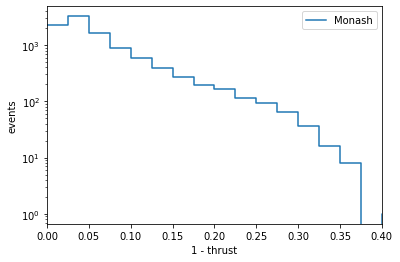

In [11]:
# Plot the thrust histogram.
plot([monash.hist], 
     xlim = (0, 0.4), ylog = True, xlabel = "1 - thrust", ylabel = "events")

Now that we have generated a thrust distribution, let's try generating with a significantly higher value of $\as$.

In [12]:
# Create a new analysis.
varAlpha = AnalyzeThrust("alpha_s = 0.2")

# Push up the alpha_s value.
pythia.readString("TimeShower:alphaSvalue = 0.2")
pythia.init()

True

In [13]:
# Run Pythia.
pythia.run(nEvt, varAlpha.run)


 PythiaParallel::run(): 1000 events have been generated

 PythiaParallel::run(): 2000 events have been generated

 PythiaParallel::run(): 3000 events have been generated

 PythiaParallel::run(): 4000 events have been generated

 PythiaParallel::run(): 5000 events have been generated

 PythiaParallel::run(): 6000 events have been generated

 PythiaParallel::run(): 7000 events have been generated

 PythiaParallel::run(): 8000 events have been generated

 PythiaParallel::run(): 9000 events have been generated


[1667, 1667, 1667, 1667, 1666, 1666]

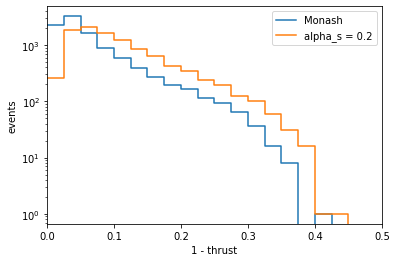

In [14]:
# Compare the two thrust histograms.
plot([monash.hist, varAlpha.hist],
     xlim = (0, 0.5), ylog = True, xlabel = "1 - thrust", ylabel = "events")

Try using a few different values of $\as$ to see what happens with the distribution. For example, we could try setting $\as$ to a lower value than the Monash tune, so something like 0.1. In the cells above, we can do this by creating another `AnalyzeThrust` object and then plotting all the different distributions using the command `plot([analysis1.hist, analysis2.hist, analysis3.hist, ...])`. From a model perspective, try to build an intuition as to why the thrust changes as it does for these different parameter values.

We can also explore different values of the shower cut-off value sepcified by the parameter `TimeShower:pTmin`. This is by default set to 0.5 GeV, but we can change it to something higher, like 2 GeV. We can also try lower values as well, although at some point this will cause failures in the hadronization process.

In [15]:
# Create a new analysis.
varPT = AnalyzeThrust("pT = 2")

# Push up the pT cut-off. We need set the Monash tune again
# to reset the value of alpha_s. Note, this should be called
# before changing other parameters.
pythia.readString("Tune:ee = 7")
pythia.readString("TimeShower:pTmin = 2")
pythia.init()

True

In [16]:
# Run Pythia.
pythia.run(nEvt, varPT.run)


 PythiaParallel::run(): 1000 events have been generated

 PythiaParallel::run(): 2000 events have been generated

 PythiaParallel::run(): 3000 events have been generated

 PythiaParallel::run(): 4000 events have been generated

 PythiaParallel::run(): 5000 events have been generated

 PythiaParallel::run(): 6000 events have been generated

 PythiaParallel::run(): 7000 events have been generated

 PythiaParallel::run(): 8000 events have been generated

 PythiaParallel::run(): 9000 events have been generated


[1667, 1667, 1667, 1667, 1666, 1666]

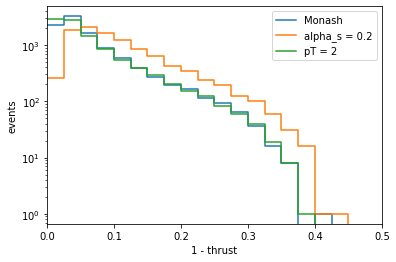

In [17]:
# Compare with the change in pT cut-off.
plot([monash.hist, varAlpha.hist, varPT.hist],
     xlim = (0, 0.5), ylog = True, xlabel = "1 - thrust", ylabel = "events")

From this, we can see whether changing the shower cut-off scale is a more or less senstive variable for the thrust distribution than $\as$. One final parameter we can explore is how we run $\as$. The Monash tune by default runs the time shower at first order with `TimeShower:alphaSorder = 1`. We can run $\as$ at second order (or zeroth order), and see how this affects the thrust distribution.

In [ ]:
# Create a new analysis.
varOrder = AnalyzeThrust("order = 2")

# Change the order of the alpha_s running.
pythia.readString("Tune:ee = 7")
pythia.readString("TimeShower:alphaSorder = 2")
pythia.init()

In [ ]:
# Run Pythia.
pythia.run(nEvt, varOrder.run)

In [ ]:
# Compare with the change in alpha_s order.
plot([monash.hist, varAlpha.hist, varPT.hist, varOrder.hist], 
     xlim = (0, 0.5), ylog = True, xlabel = "1 - thrust", ylabel = "events")

We can try other $\as$ orders to see if this makes any substantial difference. In Pythia the possible options are `0`, `1`, `2`, or `3`.

<a id='lighFragmentation'></a>
## Light-Flavour Fragmentation

Given a set of post-shower partons, resolved at a scale of $Q_\mathrm{had} \sim$ 1 GeV, the non-perturbative stage of the fragmentation modeling now takes over, to convert the partonic state into a set of on-shell hadrons. In the leading-colour approximation, each perturbative dipole is dual to a non-perturbative string piece. Quarks thus become string endpoints, while gluons become transverse kinks, connecting two string pieces. The Lund string fragmentation model describes the fragmentation of such string systems into on-shell hadrons.

Since the shower has already resolved all the (perturbative) physics down to a transverse-momentum scale of $\pTmin =$ 0.5 GeV (for the Monash 2013 tune), the Monash authors found it reasonable that the $\pT$ kicks involved in string breaking should effectively average over dynamics in roughly the range 250 MeV $= \sqrt\kappa/\pi < \sigma_\perp < \pTmin$, with the lower bound given by Fermi motion (with $\kappa$ the string tension). Further, since the Monash authrs here choose $\pTmin$ to be only slightly greater than $\Lambda_\mathrm{QCD}$, the size of the non-perturbative corrections is naturally limited to kicks/corrections appropriate for non-perturbative dynamics (in contrast, *e.g.*, to the cluster model, which can generate substantially larger kicks, of order the largest allowed cluster mass, which can be several GeV). For the Monash 2013 tune, the authors settled on a value of $\sigma_\perp =$ 0.335 GeV, with a small (1%) tail of breaks involving higher $\pT$ values carried over from the default settings.

```
StringPT:sigma = 0.335
StringPT:enhancedFraction = 0.01
StringPT:enhancedWidth = 2.0
```

For massless quarks, the longitudinal component of the energy carried by a hadron formed in the
string-breaking process string $\to$ hadron + string' is governed by the Lund symmetric fragmentation
function:

$$f(z) \propto \frac{z^{(a_i - a_j)}(1-z)^{a_j}}{z} \exp\frac{-b m^2_{\perp}}{z}$$

where $z$ is the energy carried by the newly formed $(ij)$ hadron, expressed as a fraction of the light-cone energy of the quark (or antiquark) endpoint, $i$, of the fragmenting string. The remaining energy fraction, $(1 - z)$, goes to the new string' system, from which another hadron can be split off in the same matter, etc., until all the energy is used up. The transverse mass of the produced $(ij)$ hadron is defined by $m^2_{\perp} = m^2_{\mathrm{had}} + p^2_{\perp,\mathrm{had}}$, hence heavier hadrons have harder spectra. The proportionality
sign in the Lund symmetric fragmentation functions indicates that the function is to be normalized to unity.

The $a$ and $b$ parameters govern the shape of the fragmentation function, and must be constrained by fits to data. The equation above expresses the most general form of the fragmentation function, for which the $a$ parameters of the original string-endpoint quark, $a_i$, and that of the (anti-)quark produced in the string break, $a_j$, can in principle be different, while the $b$ parameter is universal. Within the Lund model, the $a$ value is normally also taken to be universal, the same for all quarks, with the only freedom being that a larger $a$ parameter can be assigned to diquarks, from which baryons are formed, and hence meson and baryon spectra can be decoupled somewhat.

Roughly speaking, large a parameters suppress the hard region $z \to 1$, while a large $b$ parameter suppresses the soft region $z \to 0$. By adjusting them independently, both the average hardness and the width of the resulting fragmentation spectra can be modified. For example, increasing both $a$ and $b$ yields a narrower  distribution, while changing them in opposite directions moves the average. The following code illustrates the effect of varying the $a$ and $b$ parameters, for $a_i = a_j \equiv a$.

In [ ]:
# Define the Lund symmetric fragmentation function.
def lund(z, a, b, mT):
    """
    The Lund symmetric fragmentation function, normalized.
    
    z:  energy fraction taken by the string.
    a:  a parameter which might depend on the quark flavor.
    b:  b parameter which is flavor independent.
    mT: transverse mass of the hadron.
    """
    import numpy
    f = z**a*(1 - z)**a/z*numpy.exp(-b*mT**2/z)
    return  f/numpy.trapz(f, z)

In [ ]:
# Plot the fragmentation function for varying a and fixed b.
import numpy
z = numpy.linspace(0.01, 1, 100)
pyplot.plot(z, lund(z, a = 0.9, b = 1, mT = 1), label = "a = 0.9")
pyplot.plot(z, lund(z, a = 0.1, b = 1, mT = 1), label = "a = 0.1")
pyplot.xlabel("z")
pyplot.ylabel("f(z)")
pyplot.legend();

In [ ]:
# Plot the fragmentation function for varying b and fixed a.
import numpy
z = numpy.linspace(0.01, 1, 100)
pyplot.plot(z, lund(z, a = 0.5, b = 0.5, mT = 1), label = "b = 0.5")
pyplot.plot(z, lund(z, a = 0.5, b = 2.0, mT = 1), label = "b = 2.0")
pyplot.xlabel("z")
pyplot.ylabel("f(z)")
pyplot.legend();

Try varying $a$, $b$, and $m_{\perp}$ above to gain an intuition of how the parameters change the fragmentation probability. Note that the $\sigma_{\perp}$ parameter also affects the hardness, with larger $\sigma_{\perp}$ values generating harder hadrons, the difference being that the $\sigma_{\perp}$ parameter acts mainly in the direction transverse to the string (and is an absolute scale expressed in GeV), while the $a$ and $b$ parameters act longitudinally (with $z$ a relative scale expressed as a fraction of the endpoint's energy).

In the context of the Monash tune, the authors included the possibility of letting the $a$ parameter for strange
quarks be slightly different from that of $\u$ and $\d$ quarks, but did not find any significant advantages. The relevant parameters in the code for the Monash tune are:

```
StringZ:aLund         = 0.68
StringZ:bLund         = 0.98
StringZ:aExtraDiquark = 0.97
StringZ:aExtraSquark  = 0.00
```

The average hardness of the produced hadrons is tightly (anti-)correlated with the average multiplicity, via momentum conservation: if each hadron takes a lot of energy, then fewer hadrons must be made, and vice versa. Thus, the $\sigma_{\perp}$ value and the $a$ and $b$ parameters of the fragmentation function
can be well constrained by simultaneously considering both momentum and multiplicity spectra. In
order to be as universal as possible, one normally uses the inclusive charged-particle spectra for this
purpose. We define the momentum fraction as:

$$x_p = \frac{2|p|}{E_\mathrm{cm}}$$

where $p$ is the momentum of the charged hadron, and $E_\mathrm{cm}$ is the centre-of-mass energy of the system. First, we write an analysis that fills histograms for both the momentum and multiplicity.


In [ ]:
class AnalyzeFrag:
    """
    Class to perform a multiplicity and momentum fraction analysis.
    """
    
    def __init__(self, title = "default",
                 nBinsMult = 31, xLowMult = -0.5, xHighMult = 60.5,
                 nBinsFrac = 20, xLowFrac = 0, xHighFrac = 8):
        """
        Define the constructor.

        title:            title of the histograms.
        nBins[Mult,Frac]: number of bins in the multiplicity/fraction histogram.
        xLow[Mult,Frac]:  lowest bin edge of the histograms.
        xHigh[Mult,Frac]: highest bin edge of the histograms.
        """
        # Create the histogram for storing the multiplicity and momentum
        # fraction.
        self.mult = pythia8.Hist(title, nBinsMult, xLowMult, xHighMult)
        self.frac = pythia8.Hist(title, nBinsFrac, xLowFrac, xHighFrac)
        
    def run(self, pythiaNow):
        """
        Define the analysis.
        
        pythiaNow: the Pythia instance containing the event to analyze.
        """
        import math
        
        # Loop over all the particles.
        nChr = 0
        for prt in pythiaNow.event:
            
            # Check the particle is final and charged.
            if prt.isFinal() and prt.isCharged():
                nChr += 1
            
                # Fill the momentum fraction.
                self.frac.fill(
                    abs(math.log(2*prt.pAbs()
                    /pythiaNow.infoPython().eCM())))
            
        # Fill the multiplicity.
        self.mult.fill(nChr)

In [ ]:
# Create a new analysis.
monash = AnalyzeFrag("Monash")

# Start with the Monash tune.
pythia.readString("Tune:ee = 7")
pythia.init()

In [ ]:
# Run Pythia.
nEvt = 10000
pythia.run(nEvt, monash.run)

In [ ]:
# Plot the multiplicity histogram.
plot([monash.mult], 
     ylog = True, xlabel = "n charged", ylabel = "prob", norm = True)

Note the subtlety of the binning in this histogram. First, the charge multiplicity must be an integer number, and so it is important to ensure the bin edges line up between integers. Second, the initial state is $\e^+\e^-$, and so charge conservation requires the final number of charged particles to be even. This can be seen by running the analysis above and changing `nBinsMult` to `61` rather than the default `31`.

In [ ]:
# Plot the momentum fraction histogram.
plot([monash.frac], 
     ylog = True, xlabel = "|ln(x_p)|", ylabel = "prob", norm = True)

Now that we have these distributions, we can try varying some of the relevant parameters and plotting the relevant distributions. First, we can try varying the $a$ parameter.

In [ ]:
# Create a new analysis.
varA = AnalyzeFrag("a = 0.1")

# Vary the Lund a parameter.
pythia.readString("Tune:ee = 7")
pythia.readString("StringZ:aLund = 0.1")
pythia.init()

In [ ]:
# Run Pythia.
pythia.run(nEvt, varA.run)

In [ ]:
# Plot the multiplicity histogram.
plot([monash.mult, varA.mult], 
     ylog = True, xlabel = "n charged", ylabel = "prob", norm = True)

We can try running with a number of different $a$ values. Why does decreasing $a$ decrease the multiplicity? We can also check how this changes the momentum fraction.

In [ ]:
# Plot the momentum fraction histogram.
plot([monash.frac, varA.frac], 
     ylog = True, xlabel = "|ln(x_p)|", ylabel = "prob", norm = True)

Try changing both `StringZ:bLund` and `StringPT:sigma` and see how this changes these distributions. Explore a number of different values.

In the context of fits to experimental data, note that the $a$ and $b$ parameters typically exhibit a very high degree of correlation. An option for choosing an alternative parameterization is therefore provided, whereby the user specifies the desired average value of the fragmentation function for primary $\rho$ mesons rather than the $b$ parameter. The $a$ parameter should still be given by `StringZ:aLund` as usual. The $\rho$ meson has been chosen as a reference since its mass is near the average of the primary hadron production, while pions come to dominate only after secondary decays. This option can be enabled via the flag `StringZ:deriveBLund`. When set to `on`, the $b$ parameter is treated as a derived quantity; *i.e.*, the value of `StringZ:bLund` is ignored in favour of the `StringZ:avgZLund` parameter. The `StringZ:bLund` parameter is then also reset to the derived value so that it can be queried after initialization, if desired. The `StringZ:avgZLund` parameter specifies the average of the fragmentation function for primary $\rho$ mesons, evaluated at $m^2_{\perp} = m^2_\rho + 2\sigma^2_{\perp}$. Note that the derived value is allowed to exceed the nominal limits given for `StringZ:bLund` above. This is intended to allow fits to see the functional behaviour even outside the nominal limits.

Try working with `StringZ:avgZLund` to help understand the correlation between the $a$ and $b$ parameters.

<a id='identifiedParticles'></a>
## Identified Particles

The extraction of the $a$ and $b$ parameters from the inclusive charged-particle distributions is made slightly more complicated by the fact that not all observed particles are "primary" (originating directly from string breaks); many lower-mass particles are "secondaries", produced by prompt decays of more massive states (*e.g.*, $\rho \to \pi \pi$), whose relative rates and decay kinematics therefore influence the spectra. In the $\e^+ \e^−$ measurements we include here, particles with $c\tau <$ 100 mm were treated as unstable, hence leading to secondaries. For completeness, we note that the equivalent standard cut at the LHC is normally 10 mm. The particle composition in Pythia was already tuned to a set of reference values provided by the PDG , and the default parameters do reasonably well, certainly for the most copiously produced sources of secondaries. Nonetheless, the Monash authors reoptimized the flavour-selection parameters of the string-fragmentation model using a slightly different set of reference data, combining the PDG tables with information provided directly by the LEP experiments via HEPDATA. Based on the level of agreement or disagreement between different measurements of the same particles, the Monash authors used their own judgement as to the level of uncertainty for a few of the particles, as outlined in their paper.

The light-flavour-selection parameters for the Monash tune are:

```
# Light-meson sector.
StringFlav:probStoUD        = 0.217
StringFlav:mesonUDvector    = 0.5
StringFlav:mesonSvector     = 0.55
StringFlav:etaSup           = 0.60
StringFlav:etaPrimeSup      = 0.12

# Baryon sector.
StringFlav:probQQtoQ        = 0.081
StringFlav:probSQtoQQ       = 0.915
StringFlav:probQQ1toQQ0     = 0.0275
StringFlav:suppressLeadingB = off
StringFlav:popcornSpair     = 0.9
StringFlav:popcornSmeson    = 0.5
```

Since strange-particle and baryon spectra at the LHC exhibit interesting differences with respect to existing models, the Monash authors paid particular attention to first obtaining a good description of these sectors in $\e^+ \e^-$ collisions. Specifically, the Monash authors increased the overall amount of strangeness by about 10%, while decreasing the rate of vector mesons by a similar amount (these two effects largely cancel for $\K^*$). This improves the total $\K^\pm, \rho^0, \omega, \Lambda, \Xi^*$, $\Omega$ yields to the combined LEP estimates discussed above. The price is that measured rate of $\Xi^\pm$ baryons is overestimated by 10%.

A number of observables are useful in tuning the flavour parameters: the identified-meson and -baryon rates, and particle species specific momentum-fraction spectra. We can construct an analysis which fills histograms for both of these observables.

In [ ]:
class AnalyzeFlavor:
    """
    Class to perform a flavor analysis.
    """
    labels = {
        "mesons": [211, 111, 321, 221, 331, 213, 113, 323, 223, 333],
        "baryons": [2212, 3122, 3222, 3212, 2224, 3214, 3314, 3324, 3334]
    }
    
    def __init__(self, title = "default", nBins = 20, xLow = 0, xHigh = 5):
        """
        Define the constructor.

        title: title of the histograms.
        nBins: number of bins in the fraction histogram.
        xLow:  lowest bin edge of the histograms.
        xHigh: highest bin edge of the histograms.
        """
        # Create the histogram for storing the meson and baryon numbers and
        # the momentum fraction.
        self.pdb     = pythia8.Pythia("", False).particleData
        self.nEvt    = 0
        self.nChr    = 0
        self.mesons  = pythia8.Hist(title, 10, -0.5, 9.5)
        self.baryons = pythia8.Hist(title, 10, -0.5, 9.5)
        self.fracs   = {
            pid: pythia8.Hist(title, nBins, xLow, xHigh)
            for pid in self.labels["mesons"] + self.labels["baryons"]}
        
    def run(self, pythiaNow):
        """
        Define the analysis.
        
        pythiaNow: the Pythia instance containing the event to analyze.
        """
        import math
        self.nEvt += 1
        
        # Loop over all the particles.
        for prt in pythiaNow.event:
            
            # Check the particle is final and charged.
            if prt.isFinal() and prt.isCharged():
                self.nChr += 1
            
            # Check the particle is in the list.
            pid = prt.idAbs()
            try: self.mesons.fill(self.labels["mesons"].index(pid))
            except:
                try: self.baryons.fill(self.labels["baryons"].index(pid))
                except: pass
                    
            # Fill the momentum fraction.
            if pid in self.fracs: 
                self.fracs[pid].fill(
                    abs(math.log(2*prt.pAbs()
                    /pythiaNow.infoPython().eCM())))
                
    def finalize(self):
        """
        Finalize the multiplicity histograms by dividing by the average
        charge multiplicity.
        """
        # Normalize the momentum fractions.
        for pid, hist in self.fracs.items():
            hist *= 1./(hist.getEntries()*hist.getBinWidth())
            
        # Normalize the meson and baryon mults.
        self.mesons  *= 1./self.nChr
        self.baryons *= 1./self.nChr

            
    def axis(self, key):
        pids = self.labels[key]
        pyplot.xticks(
            range(len(pids)), [self.pdb.name(pid) for pid in pids],
            rotation = -90)

In [ ]:
# Create a new analysis.
monash = AnalyzeFlavor("Monash")

# Start with the Monash tune.
pythia.readString("Tune:ee = 7")
pythia.init()

In [ ]:
# Run Pythia and finalize the output.
pythia.run(nEvt, monash.run)
monash.finalize()

In [ ]:
# Plot the meson multiplicity histogram.
plot([monash.mesons], 
     ylog = True, xlabel = "", ylabel = "<n>/<n charged>", fnc = monash.axis("mesons"))

In [ ]:
# Plot the baryon multiplicity histogram.
plot([monash.baryons], 
     ylog = True, xlabel = "", ylabel = "<n>/<n charged>", fnc = monash.axis("baryons"))

In [ ]:
# Plot the Lambda0 momentum-fraction histogram.
plot([monash.fracs[3122]], 
     xlabel = "|ln(x_p)|", ylabel = "prob")

We can try enhancing certain flavors. For example, if we can enhance the producion of vector mesons with light $(\u, \d)$ content, by increasing the `StringFlav:mesonUDvector` parameter. A full description of the flavor parameters can be found in the [Flavor Selection](https://pythia.org/manuals/pythia8309/FlavourSelection.html) section of the [Pythia 8.3 HTML manual](https://pythia.org/manuals/pythia8309/Welcome.html). A brief summary the parameters governing standard meson production are given here.
* `StringFlav:mesonUDvector` - the relative production ratio vector/pseudoscalar for light ($\u, \d$) mesons.
* `StringFlav:mesonSvector` - the relative production ratio vector/pseudoscalar for strange mesons.
* `StringFlav:mesonCvector` - the relative production ratio vector/pseudoscalar for charm mesons.
* `StringFlav:mesonBvector` - the relative production ratio vector/pseudoscalar for bottom mesons. 

In [ ]:
# Create a new analysis.
varVectorUD = AnalyzeFlavor("vectorUD = 3")

# Increase ud-vector production.
pythia.readString("Tune:ee = 7")
pythia.readString("StringFlav:mesonUDvector = 3")
pythia.init()

In [ ]:
# Run Pythia and finalize the output.
pythia.run(nEvt, varVectorUD.run)
varVectorUD.finalize()

In [ ]:
# Plot the meson multiplicity histogram.
plot([monash.mesons, varVectorUD.mesons], 
     ylog = True, xlabel = "", ylabel = "<n>/<n charged>", fnc = monash.axis("mesons"))

Explore the flavor space further, including seeing how the momentum fractions for specific species can be changed by these parameters.

<a id='further'></a>
## Further Study

This tutorial only covers from the start of section 2 of the [Monash Tune paper](https://arxiv.org/pdf/1404.5630.pdf), up to and including section 2.2. Heavy flavor (section 2.3) is not covered, neither are hadron collisions (section 3) nor energy scaling (section 4). However, the exercises here should provide sufficient background for study of these additional topics. Note, however, that generating full LHC events can be considerably slower than LEP events.